## ステップ関数(step function)

$
f(x) = \left\{
\begin{array}{}
0 & (x < 0)\\
1 & (x \geq 0)
\end{array}
\right.
$

**入力した値(x)が0未満なら出力する値(f(x))は0。<br>
入力した値(x)が0以上なら出力する値(f(x))は1。**

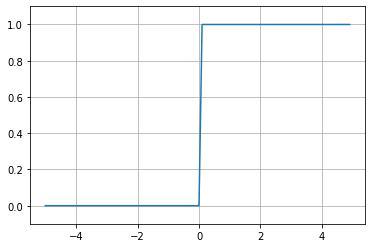

In [44]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    y = x > 0
    return y.astype(np.int)

x = np.arange(-5.0, 5.0, .1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.grid()
plt.show()

## シグモイド関数(sigmoid function)

$
h(x) = \frac{1}{1 + e^{-x}}\\
e^{-x}はnumpyではnp.exp(-x)と書く。
$
**入力した値(x)が大きければ大きいほど1に近づき、<br>
入力した値(x)が小さければ小さいほど0に近づく関数。**<br>
**h(x)が大きいと出力は1に近づき、h(x)が小さいと出力が0に近づく。**<br>
シグモイド関数を用いると0~1までの連続値を出力することができる。

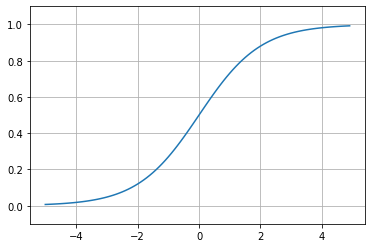

In [39]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.grid()
plt.show()

In [40]:
sigmoid(0.8)

0.6899744811276125

## ReLU関数(Rectified Linear Unit)
$
f(x) = \left\{
\begin{array}{}
x & {(x \geq 0)}\\
0 & {(x < 0)}
\end{array}
\right.
$
<br>
**入力した値(x)が0以下の時0になり、入力した値(x)が0より大きければ入力をそのまま出力する関数。<br>
ReLU関数は最も一般的に用いられる関数で、勾配消失が起こりにくい関数である。**

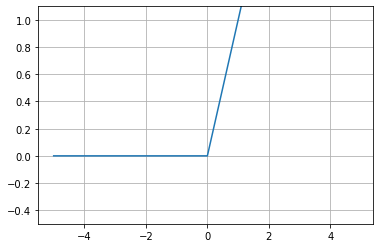

In [31]:
import numpy as np
import matplotlib.pylab as plt

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.5, 1.1)
plt.grid()
plt.show()

In [38]:
relu(-0.1)

0.0

## 恒等関数(identity function)
$
f(x) = x
$
<br>
**入力した値と同じ値を常にそのまま出力する関数。**

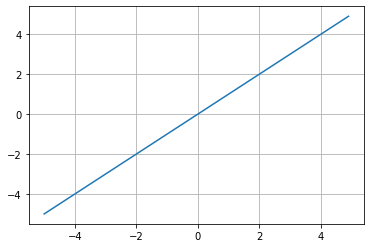

In [28]:
import numpy as np
import matplotlib.pylab as plt

def koutou(x):
    return x

x = np.arange(-5.0, 5.0, 0.1)
y = koutou(x)
plt.plot(x, y)
plt.grid()
plt.show()

In [30]:
koutou(2)

2

## ソフトマックス関数(softmax function)
$
y_i = \frac{e^{x_i}}{\sum_{k=1}^{n}e^{x_k}}　(i = 1, 2, 3,..., n)
$
<br>
**ソフトマックス関数は複数に出力された値の合計が100%(1.0)になるように調整する関数。**<br>
一般的に分類問題で使われ、出力層で使われる関数。

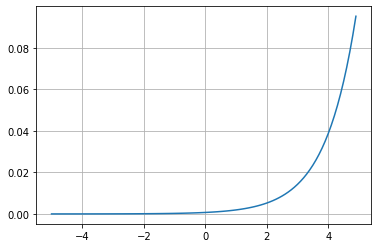

In [24]:
import numpy as np
import matplotlib.pylab as plt

def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

x = np.arange(-5.0, 5.0, 0.1)
y = softmax(x)
plt.plot(x, y)
plt.grid()
plt.show()

In [26]:
softmax(x=[0.6, 0.2, 0.2])

array([0.42723356, 0.28638322, 0.28638322])

In [23]:
softmax(x=[0.99, 0.23, 0.5])

array([0.48070156, 0.22480798, 0.29449046])

# ReLU 一族
***
## Leaky ReLU関数
***
$
f = \left\{
\begin{array}{}
x & {(x > 0)}\\
ax & {(x \leqq 0)}
\end{array}
\right.
$
<br>

**0を起点として、入力値(x)が0以下なら「入力した値(x)とa倍した値」(a倍は基本的に0.01倍)を出力、0より大きいなら「入力した値(x)と同じ値」を出力する、ニューラルネットワークの活性化関数を指す。**ReLUの拡張版。

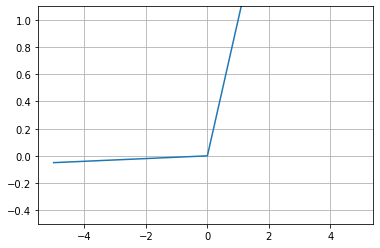

In [15]:
import numpy as np
import matplotlib.pylab as plt

def lrelu(x, alpha=0.01):
    y = np.where(x > 0.0, x, alpha * x)
    return y

x = np.arange(-5.0, 5.0, 0.1)
y = lrelu(x, alpha=0.01)
plt.plot(x, y)
plt.ylim(-0.5, 1.1)
plt.grid()
plt.show()

## Parametric ReLU関数
ReLuの傾きをparametricにした。<br>
$
f = \left\{
\begin{array}{}
x & {(x > 0)}\\
ax & {(x \leqq 0)}
\end{array}
\right.
$
<br>
Parametric ReLU関数は、入力値(x)が0以下なら「入力値とa倍した値」を出力し、入力値(x)が０より大きいなら「入力値と同じ値」をそのまま出力する関数。<br>
**今回はa=0.01ではなく、パラメータになる。なので学習によって異なる。**<br>


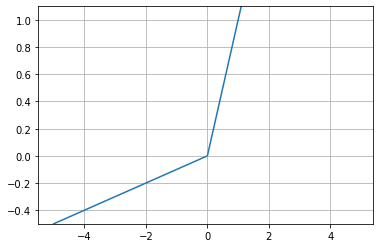

In [18]:
import numpy as np
import matplotlib.pylab as plt

def prelu(x, alpha=0.1):
    y = np.where(x > 0.0, x, alpha * x)
    return y

x = np.arange(-5.0, 5.0, 0.1)
y = prelu(x, alpha=0.1)
plt.plot(x, y)
plt.ylim(-0.5, 1.1)
plt.grid()
plt.show()

## Exponential Linear Units
$
f = \left\{
\begin{array}{}
x & {(x > 0)}\\
a(e^{x} -1) & {(x \leqq 0)}
\end{array}
\right.\\
a = 1.0
$
<br>
**Exponential Linear Units関数は、入力値(x)が0以下なら「0」~「-a」(aは基本的に1.0)の間の値を出力、入力値(x)が0より大きいなら「入力値と同じ値」をそのまま出力する、ニューラルネットワークの活性化関数を指す。**

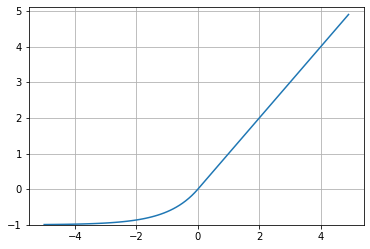

In [31]:
import numpy as np
import matplotlib.pylab as plt


def elu(x, alpha=1.0):
    y = np.where(x > 0.0, x, alpha*(np.exp(x) -1) )
    return y

x = np.arange(-5.0, 5.0, 0.1)
y = elu(x, alpha=1.0)
plt.plot(x, y)
plt.ylim(-1.0, 5.1)
plt.grid()
plt.show()

## np.where()
条件式conditionを満たす場合(真Trueの場合)はx, 満たさない場合(偽Falseの場合)はyとするndarrayを返す関数。x, yを省略した場合は、条件を満たすindexを返す。